<h1 style="color: darkblue; font-family: 'Comic Sans MS', cursive, sans-serif;">Analyzing Naming Trends Using Python</h1>

<h3 style="font-family: 'Arial', sans-serif;">Objective:</h3><p>The dataset is in zipped format. We have to extract  Extract the dataset, count the number of male and female babies born in each year, and identify the most common baby names.</p>

In [1]:
import pandas as pd
import zipfile
from io import BytesIO

In [2]:
z = zipfile.ZipFile(r"E:\Projects Datas\names.zip")
final_data = pd.DataFrame(columns = ['Name', 'Gender', 'Births', 'Year'])
for i in z.infolist():
    if(i.filename.endswith('txt')):
        year = i.filename[3:7]
        data = pd.read_csv(BytesIO(z.read(i.filename)),names = ['Name','Gender', 'Births', 'Year'], encoding='utf-8', engine='python', header=None)
        data['Year'] = int(year)
        final_data = pd.concat([final_data, data])

In [4]:
data = final_data.copy()

In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085158 entries, 0 to 2085157
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Gender  object
 2   Births  object
 3   Year    object
dtypes: object(4)
memory usage: 63.6+ MB


In [15]:
data.head()

,Name,Gender,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


<h3 style="font-family: 'Arial', sans-serif;">Totel Births</h3>

In [20]:
total_births = data.pivot_table('Births', index='Year', columns='Gender', aggfunc=sum)

In [28]:
import matplotlib.pyplot as plt

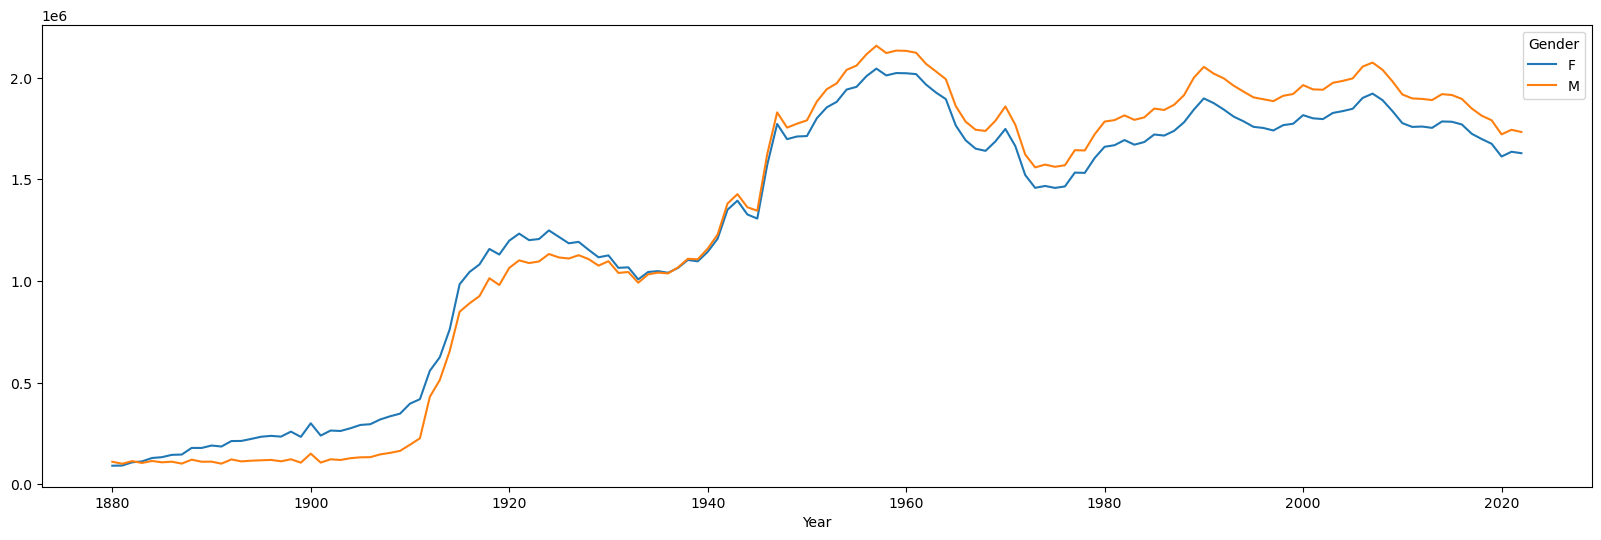

In [34]:
total_births.plot(figsize=(20, 6))
plt.show()

<h3 style="font-family: 'Arial', sans-serif;">Popular Baby names by all time</h3>

In [53]:
popular_names = data.sort_values(['Births'], ascending = False)

In [54]:
popular_names.head()

,Name,Gender,Births,Year
431063,Linda,F,99693,1947
441434,Linda,F,96215,1948
437167,James,M,94758,1947
544672,Michael,M,92785,1957
437168,Robert,M,91650,1947


In [55]:
grouped_names = popular_names.groupby('Name')['Births'].sum()
sorted_names = grouped_names.sort_values(ascending=False)
sorted_names = sorted_names.reset_index(drop=False)

In [57]:
sorted_names.head(10)

,Name,Births
0,James,5238523
1,John,5180158
2,Robert,4858239
3,Michael,4423430
4,William,4183494
5,Mary,4149886
6,David,3667664
7,Joseph,2657975
8,Richard,2582274
9,Charles,2430018


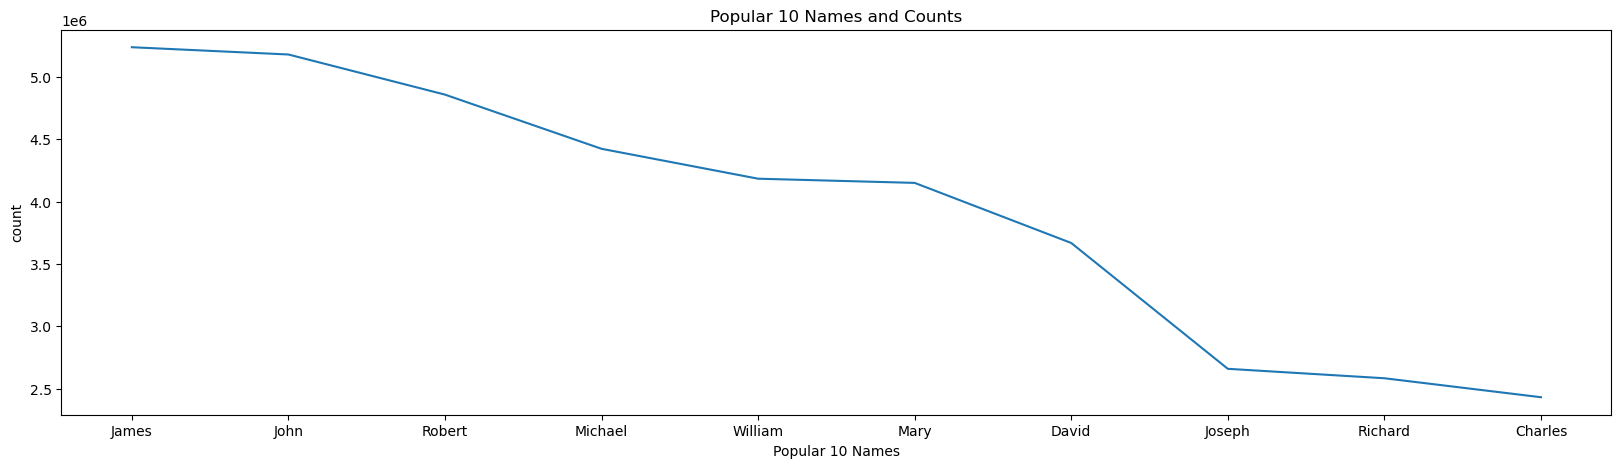

In [67]:
s = sorted_names.head(10)
plt.figure(figsize=(20,5))
plt.plot(s['Name'], s['Births'])
plt.xlabel('Popular 10 Names')
plt.ylabel('count')
plt.title('Popular 10 Names and Counts')
plt.show()

### Popular Names in 2022

In [71]:
popular_names_22 = popular_names[popular_names.Year == 2022]

In [73]:
popular_names_22 = popular_names_22.reset_index(drop = True)
popular_names_22.head(10)

,Name,Gender,Births,Year
0,Liam,M,20456,2022
1,Noah,M,18621,2022
2,Olivia,F,16573,2022
3,Oliver,M,15076,2022
4,Emma,F,14435,2022
5,Charlotte,F,12891,2022
6,Amelia,F,12333,2022
7,Sophia,F,12310,2022
8,James,M,12028,2022
9,Elijah,M,11979,2022


### Popular Male and Female Names In all time

In [74]:
popular_names_by_Male = popular_names[popular_names.Gender == 'M']

In [81]:
popular_names_by_Male.head()

,Name,Gender,Births,Year
437167,James,M,94758,1947
544672,Michael,M,92785,1957
437168,Robert,M,91650,1947
533203,Michael,M,90696,1956
556254,Michael,M,90567,1958


In [76]:
grouped_Male_names = popular_names_by_Male.groupby('Name')['Births'].sum()
sorted_Male_names = grouped_Male_names.sort_values(ascending=False)
sorted_Male_names = sorted_Male_names.reset_index(drop=False)

In [79]:
sorted_Male_names.head(10)

,Name,Births
0,James,5214844
1,John,5158428
2,Robert,4838129
3,Michael,4401604
4,William,4167487
5,David,3654723
6,Joseph,2647283
7,Richard,2572740
8,Charles,2417569
9,Thomas,2338310


In [80]:
popular_names_by_Female = popular_names[popular_names.Gender == 'F']

In [82]:
grouped_Female_names = popular_names_by_Female.groupby('Name')['Births'].sum()
sorted_Female_names = grouped_Female_names.sort_values(ascending=False)
sorted_Female_names = sorted_Female_names.reset_index(drop=False)

In [84]:
sorted_Female_names.head(10)

,Name,Births
0,Mary,4134713
1,Elizabeth,1668146
2,Patricia,1573024
3,Jennifer,1470012
4,Linda,1454120
5,Barbara,1435692
6,Margaret,1257878
7,Susan,1122752
8,Dorothy,1110081
9,Sarah,1090100
